# 1. Introduction
Instacart is a platform that allows customers to order groceries from participating retailers with the shopping being done by a personal shopper. Instacart has provided an anonymized dataset comprising of activities of shoppers in 2017. 

## 1.1 Objective of Project


*   Create a detailed analysis of the dataset created by Instacart.
*   Using association rule mining, find out the associations among products in the dataset and offer advise on how your findings can be applied.



# 2. Dataset Preparation

## 2.1 Data Source
The dataset  was released by Instacart in 2017. It contains over 3 million anonymized grocery orders from more than 200,000 Instacart users. This analysis will make use of this datasets.

Data source can be downloaded here: https://www.kaggle.com/c/instacart-market-basket-analysis/data

## 2.2 Libraries Used
These are the R libraries used:

In [3]:
library(dplyr) # used for data manipulation
library(ggplot2) # used for data visualization
library(repr)    # for adjusting graph size

## 2.3 Import Datasets

In [4]:
aisles <- read.csv('aisles.csv')
dept <- read.csv('departments.csv')
order_pr_train <- read.csv('order_products__train.csv')
order_pr_prior <- read.csv('order_products__prior.csv')
products <- read.csv('products.csv')
orders <- read.csv('orders.csv')

## 2.4 Data Dictionary
The dataset is a relational set of files describing customers’ orders over time. They are anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, Instacart provided between 4 and 100 of their orders, with the sequence of products purchased in each order, the week and hour of day the order was placed, and a relative measure of time between orders. Total six datasets were imported.

orders (3.4m rows, 206k users):

*   order_id: order identifier
*   user_id: customer identifier
*   eval_set: which evaluation set this order belongs in (see SET described below)
*   order_number: the order sequence number for this user (1 = first, n = nth)
*   order_dow: the day of the week the order was placed on
*   order_hour_of_day: the hour of the day the order was placed on
*   days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)

products (50k rows):

*   product_id: product identifier
*   product_name: name of the product
*   aisle_id: foreign key
*   department_id: foreign key

aisles (134 rows):

*   aisle_id: aisle identifier
*   aisle: the name of the aisle

deptartments (21 rows):

*   department_id: department identifier
*   department: the name of the department

order_products__SET (30m+ rows):
*   order_id: foreign key
*   product_id: foreign key
*   add_to_cart_order: order in which each product was added to cart
*   reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

where SET is one of the four following evaluation sets (eval_set in orders):

*   "prior": orders prior to that users most recent order (~3.2m orders)

*   "train": training data supplied to participants (~131k orders)
*   "test": test data reserved for machine learning competitions (~75k orders)


































## 2.5 Understanding Datasets

### 2.5.1 Aisles

In [5]:
dim(aisles) ## No of records

[1] 134   2

There are 134 aisles.

In [6]:
str(aisles) # structure of dataset

'data.frame':	134 obs. of  2 variables:
 $ aisle_id: int  1 2 3 4 5 6 7 8 9 10 ...
 $ aisle   : chr  "prepared soups salads" "specialty cheeses" "energy granola bars" "instant foods" ...


In [7]:
aisles$aisle <- as.factor(aisles$aisle) # convert to factor
str(aisles$aisle)

 Factor w/ 134 levels "air fresheners candles",..: 107 121 43 75 82 92 95 6 101 77 ...


In [8]:
head(aisles) #first 6 records

,aisle_id,aisle
,<int>,<fct>
1,1,prepared soups salads
2,2,specialty cheeses
3,3,energy granola bars
4,4,instant foods
5,5,marinades meat preparation
6,6,other


In [9]:
sum(is.na(aisles)) #Check for missing values

[1] 0

### 2.5.2 Departments

In [10]:
dim(dept) # number of records

[1] 21  2

There are 21 departments.

In [11]:
str(dept) #structure of dataset

'data.frame':	21 obs. of  2 variables:
 $ department_id: int  1 2 3 4 5 6 7 8 9 10 ...
 $ department   : chr  "frozen" "other" "bakery" "produce" ...


In [12]:
dept$department <- as.factor(dept$department) # convert to factor
str(dept$department)

 Factor w/ 21 levels "alcohol","babies",..: 11 16 3 20 1 13 4 19 10 6 ...


In [13]:
head(dept) #first 6 records

,department_id,department
,<int>,<fct>
1,1,frozen
2,2,other
3,3,bakery
4,4,produce
5,5,alcohol
6,6,international


In [14]:
sum(is.na(dept)) #Check for missing values

[1] 0

### 2.5.3 Ordered Products(Train)

In [15]:
dim(order_pr_train) # number of records

[1] 1384617       4

Approximately 1.38 million records.

In [16]:
str(order_pr_train) #structure of dataset

'data.frame':	1384617 obs. of  4 variables:
 $ order_id         : int  1 1 1 1 1 1 1 1 36 36 ...
 $ product_id       : int  49302 11109 10246 49683 43633 13176 47209 22035 39612 19660 ...
 $ add_to_cart_order: int  1 2 3 4 5 6 7 8 1 2 ...
 $ reordered        : int  1 1 0 0 1 0 0 1 0 1 ...


In [17]:
head(order_pr_train) #first 6 records

,order_id,product_id,add_to_cart_order,reordered
,<int>,<int>,<int>,<int>
1,1,49302,1,1
2,1,11109,2,1
3,1,10246,3,0
4,1,49683,4,0
5,1,43633,5,1
6,1,13176,6,0


In [18]:
sum(is.na(order_pr_train)) #Check for missing values

[1] 0

### 2.5.4 Ordered Products(Prior)

In [19]:
dim(order_pr_prior) # number of records

[1] 32434489        4

Approximately 32 million records.

In [20]:
str(order_pr_prior) #structure of dataset

'data.frame':	32434489 obs. of  4 variables:
 $ order_id         : int  2 2 2 2 2 2 2 2 2 3 ...
 $ product_id       : int  33120 28985 9327 45918 30035 17794 40141 1819 43668 33754 ...
 $ add_to_cart_order: int  1 2 3 4 5 6 7 8 9 1 ...
 $ reordered        : int  1 1 0 1 0 1 1 1 0 1 ...


In [21]:
head(order_pr_prior) #first 6 records

,order_id,product_id,add_to_cart_order,reordered
,<int>,<int>,<int>,<int>
1,2,33120,1,1
2,2,28985,2,1
3,2,9327,3,0
4,2,45918,4,1
5,2,30035,5,0
6,2,17794,6,1


In [22]:
sum(is.na(order_pr_train)) #Check for missing values

[1] 0

### 2.5.5 Orders

In [23]:
dim(orders) # number of records

[1] 3421083       7

Approximately 3.4 million records.

In [24]:
str(orders) # structure of dataset

'data.frame':	3421083 obs. of  7 variables:
 $ order_id              : int  2539329 2398795 473747 2254736 431534 3367565 550135 3108588 2295261 2550362 ...
 $ user_id               : int  1 1 1 1 1 1 1 1 1 1 ...
 $ eval_set              : chr  "prior" "prior" "prior" "prior" ...
 $ order_number          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ order_dow             : int  2 3 3 4 4 2 1 1 1 4 ...
 $ order_hour_of_day     : int  8 7 12 7 15 7 9 14 16 8 ...
 $ days_since_prior_order: num  NA 15 21 29 28 19 20 14 0 30 ...


In [25]:
orders$eval_set <- as.factor(orders$eval_set) # convert column to factor
str(orders$eval_set)

 Factor w/ 3 levels "prior","test",..: 1 1 1 1 1 1 1 1 1 1 ...


In [26]:
apply(is.na(orders), 2, sum) #Check columns for missing values

order_id                user_id               eval_set 
                     0                      0                      0 
          order_number              order_dow      order_hour_of_day 
                     0                      0                      0 
days_since_prior_order 
                206209

206209 missing values in the days_since_prior_order column.

In [27]:
head(orders,10) #first 10 records

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
,<int>,<int>,<fct>,<int>,<int>,<int>,<dbl>
1,2539329,1,prior,1,2,8,NA
2,2398795,1,prior,2,3,7,15
3,473747,1,prior,3,3,12,21
4,2254736,1,prior,4,4,7,29
5,431534,1,prior,5,4,15,28
6,3367565,1,prior,6,2,7,19
7,550135,1,prior,7,1,9,20
8,3108588,1,prior,8,1,14,14
9,2295261,1,prior,9,1,16,0


Records with NA in days_since_prior_order are first orders made by users

In [28]:
orders$days_since_prior_order[is.na(orders$days_since_prior_order)] <- 0

In [29]:
sum(is.na(orders$days_since_prior_order)) # Check if NAs still exist

[1] 0

### 2.5.6 Products

In [30]:
dim(products) # number of records

[1] 49688     4

Approximately 50 thousand records.

In [31]:
str(products) # structure of Dataset

'data.frame':	49688 obs. of  4 variables:
 $ product_id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ product_name : chr  "Chocolate Sandwich Cookies" "All-Seasons Salt" "Robust Golden Unsweetened Oolong Tea" "Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce" ...
 $ aisle_id     : int  61 104 94 38 5 11 98 116 120 115 ...
 $ department_id: int  19 13 7 1 13 11 7 1 16 7 ...


In [32]:
products$product_name <- as.factor(products$product_name) # convert to factor
str(products$product_name)

 Factor w/ 49688 levels ".5\\\" Waterproof Tape",..: 8654 2025 38603 40999 18605 13358 36648 11773 23302 41888 ...


In [33]:
head(products) #first 6 products

,product_id,product_name,aisle_id,department_id
,<int>,<fct>,<int>,<int>
1,1,Chocolate Sandwich Cookies,61,19
2,2,All-Seasons Salt,104,13
3,3,Robust Golden Unsweetened Oolong Tea,94,7
4,4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,38,1
5,5,Green Chile Anytime Sauce,5,13
6,6,Dry Nose Oil,11,11


### 2.5.7 Products with Aisles
To achieve this, join the products and aisles dataset using aisle_id.

In [34]:
aisles_prods <- left_join(products, aisles, by = 'aisle_id') #left join to aisle dataset
sum(is.na(aisles_prods))                                     #Check if both tables joined properly

[1] 0

In [35]:
head(aisles_prods)    # first 6 records

,product_id,product_name,aisle_id,department_id,aisle
,<int>,<fct>,<int>,<int>,<fct>
1,1,Chocolate Sandwich Cookies,61,19,cookies cakes
2,2,All-Seasons Salt,104,13,spices seasonings
3,3,Robust Golden Unsweetened Oolong Tea,94,7,tea
4,4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,38,1,frozen meals
5,5,Green Chile Anytime Sauce,5,13,marinades meat preparation
6,6,Dry Nose Oil,11,11,cold flu allergy


### 2.5.8 Products with department
To achieve this, join the products and dept dataset using department_id.



In [36]:
dept_prods <- left_join(products, dept, by = 'department_id') #left join to aisle dataset
sum(is.na(dept_prods))                                     #Check if both tables joined properly

[1] 0

In [37]:
head(dept_prods)   # first 6 records

,product_id,product_name,aisle_id,department_id,department
,<int>,<fct>,<int>,<int>,<fct>
1,1,Chocolate Sandwich Cookies,61,19,snacks
2,2,All-Seasons Salt,104,13,pantry
3,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages
4,4,Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce,38,1,frozen
5,5,Green Chile Anytime Sauce,5,13,pantry
6,6,Dry Nose Oil,11,11,personal care


# 3. Exploratory Data Analysis

## 3.1 Number of Orders per User
To achieve this, I need to group and count the order dataset by user_id

In [38]:
order_count <-  orders %>% group_by(user_id) %>% summarise (order_number = n()) %>% arrange(desc(order_number))
head(order_count)

user_id,order_number
<int>,<int>
210,100
310,100
313,100
690,100
786,100
964,100


The highest number of orders achieved by any user is 100. This includes prior orders.

In [39]:
max(order_count$user_id) #number of users recorded

[1] 206209

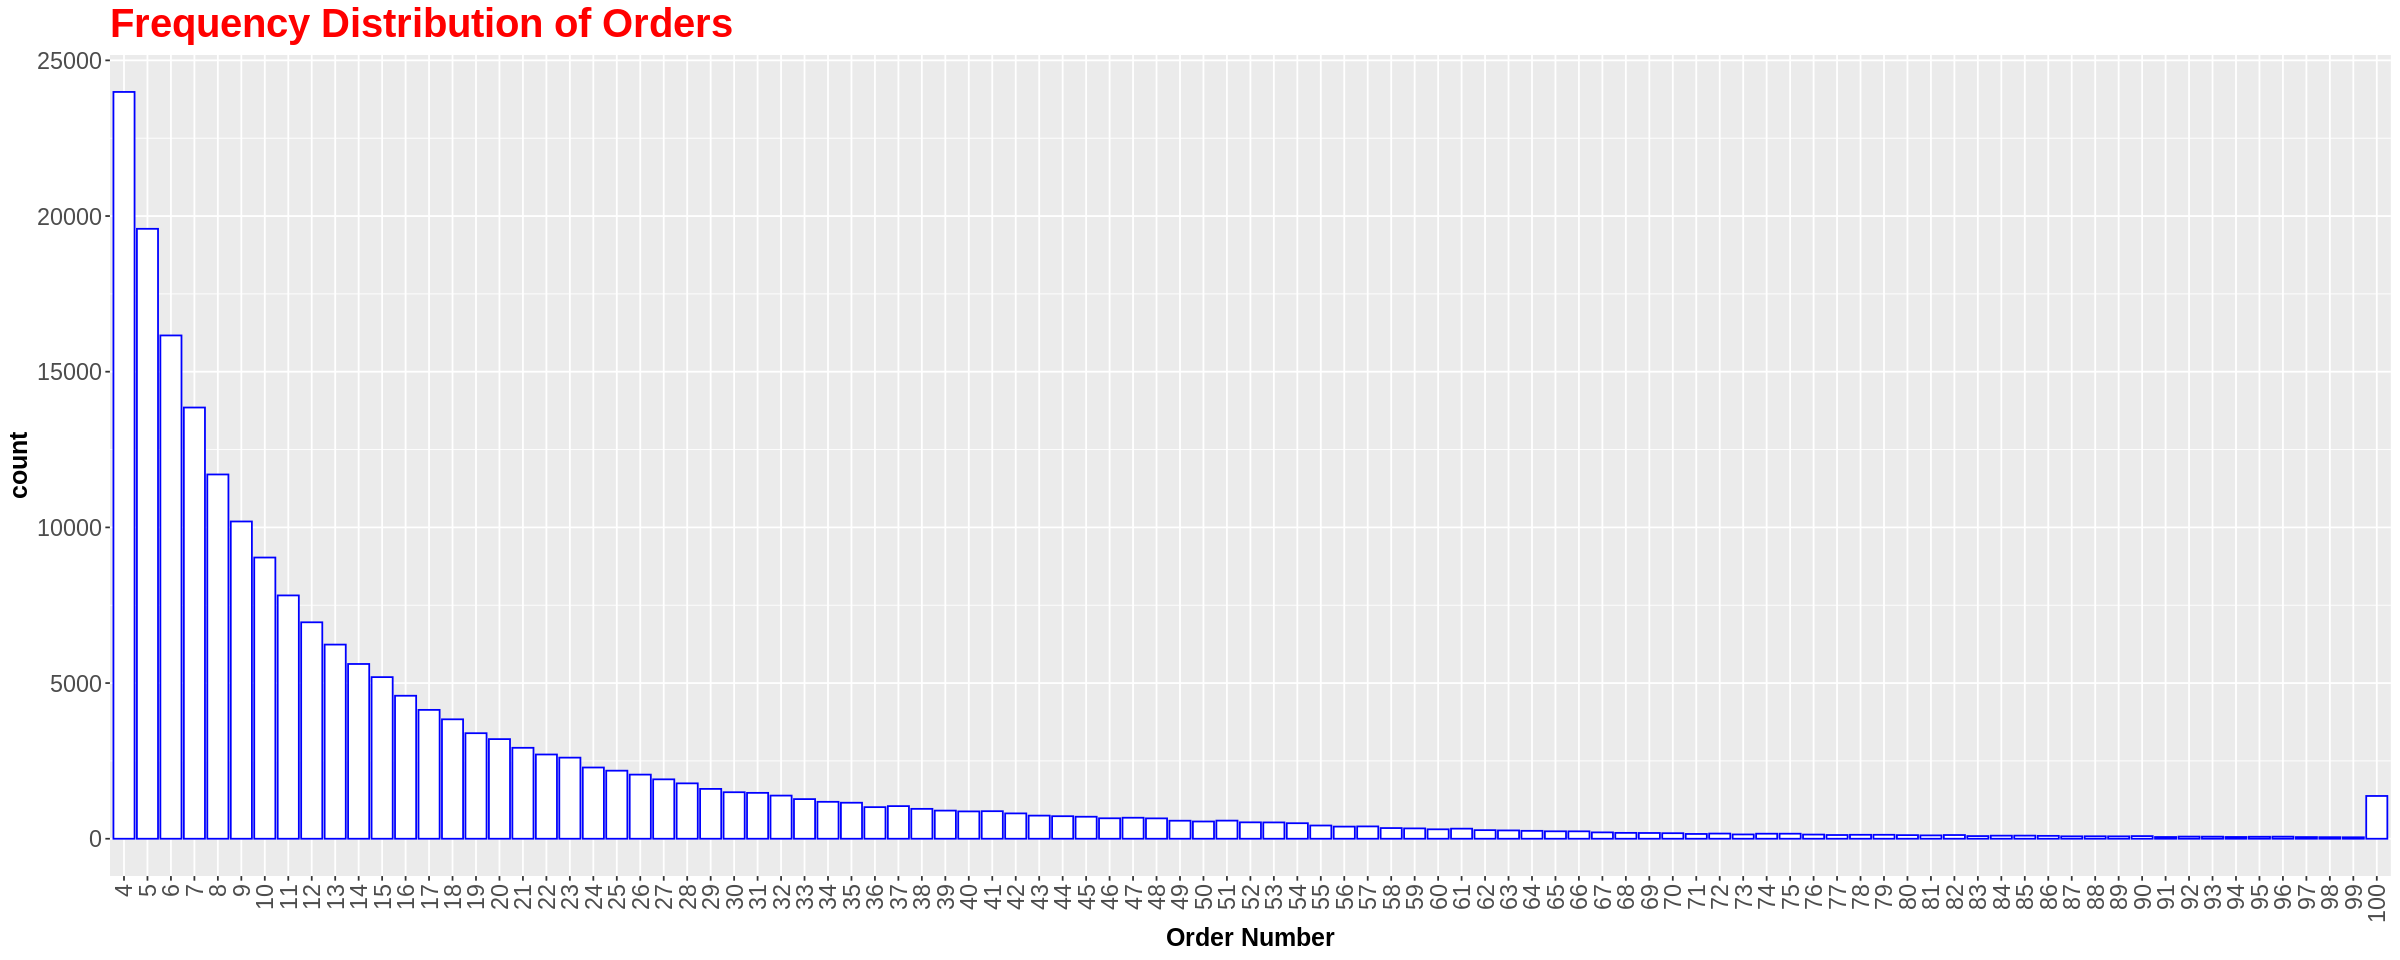

In [40]:
options(repr.plot.width = 20, repr.plot.height = 8)
ggplot(order_count) + geom_bar(aes(x = factor(order_number)), fill = 'white', color = 'blue') + ggtitle('Frequency Distribution of Orders') +
xlab('Order Number')+  scale_x_discrete(guide = guide_axis(angle = 90)) +
theme(plot.title = element_text(color="red", size=24, face="bold"),
axis.title.x = element_text(size=15, face="bold"),
axis.title.y = element_text(size=15, face="bold"),
axis.text.x = element_text(size=14),
axis.text.y = element_text(size=14))   # edit labels


The most frequent number of orders by users(about 23,700 users) is 4 and the number decreases gradually until it gets to 100, where there are about 250 users that have about 100 orders.

## 3.2 Top 10 best performing aisles
This task is further divided into the following:
1. Merge both ordered products dataset( train and prior)
2. From the orders dataset remove the records with 'test' under the eval_set column.
3. join the dataset from 2 with 1 above to find out the most ordered product id.
4. Join dataset from 4 above to aisles_prod dataset.
5. Group, count and sort (in descending order) by aisle_name to find best performing aisles.

In [41]:
order_prods <- rbind(order_pr_prior, order_pr_train) #merge both datasets vertically
dim(order_prods) # check the new number of records

[1] 33819106        4

Merged successfully

In [42]:
orders_df <- orders %>% filter(eval_set != 'test')  #remove records with 'test'
orders_df %>% filter(eval_set == 'test')

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
<int>,<int>,<fct>,<int>,<int>,<int>,<dbl>


Successfully removed

In [43]:
prods_id_ord <- left_join(orders_df, order_prods, by = 'order_id') 
sum(is.na(prods_id_ord))   #check for Nas

[1] 0

In [44]:
head(prods_id_ord)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
,<int>,<int>,<fct>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>
1,2539329,1,prior,1,2,8,0,196,1,0
2,2539329,1,prior,1,2,8,0,14084,2,0
3,2539329,1,prior,1,2,8,0,12427,3,0
4,2539329,1,prior,1,2,8,0,26088,4,0
5,2539329,1,prior,1,2,8,0,26405,5,0
6,2398795,1,prior,2,3,7,15,196,1,1


In [45]:
ais_prod_name <- left_join(prods_id_ord, aisles_prods, by = 'product_id')   # join with aisles_prod
sum(is.na(ais_prod_name))    #check for Nas

[1] 0

In [46]:
(ten_aisle <- ais_prod_name %>% group_by(aisle) %>% summarise(count = n()) %>% arrange(desc(count)) %>% top_n(10))

Selecting by count



aisle,count
<fct>,<int>
fresh fruits,3792661
fresh vegetables,3568630
packaged vegetables fruits,1843806
yogurt,1507583
packaged cheese,1021462
milk,923659
water seltzer sparkling water,878150
chips pretzels,753739
soy lactosefree,664493


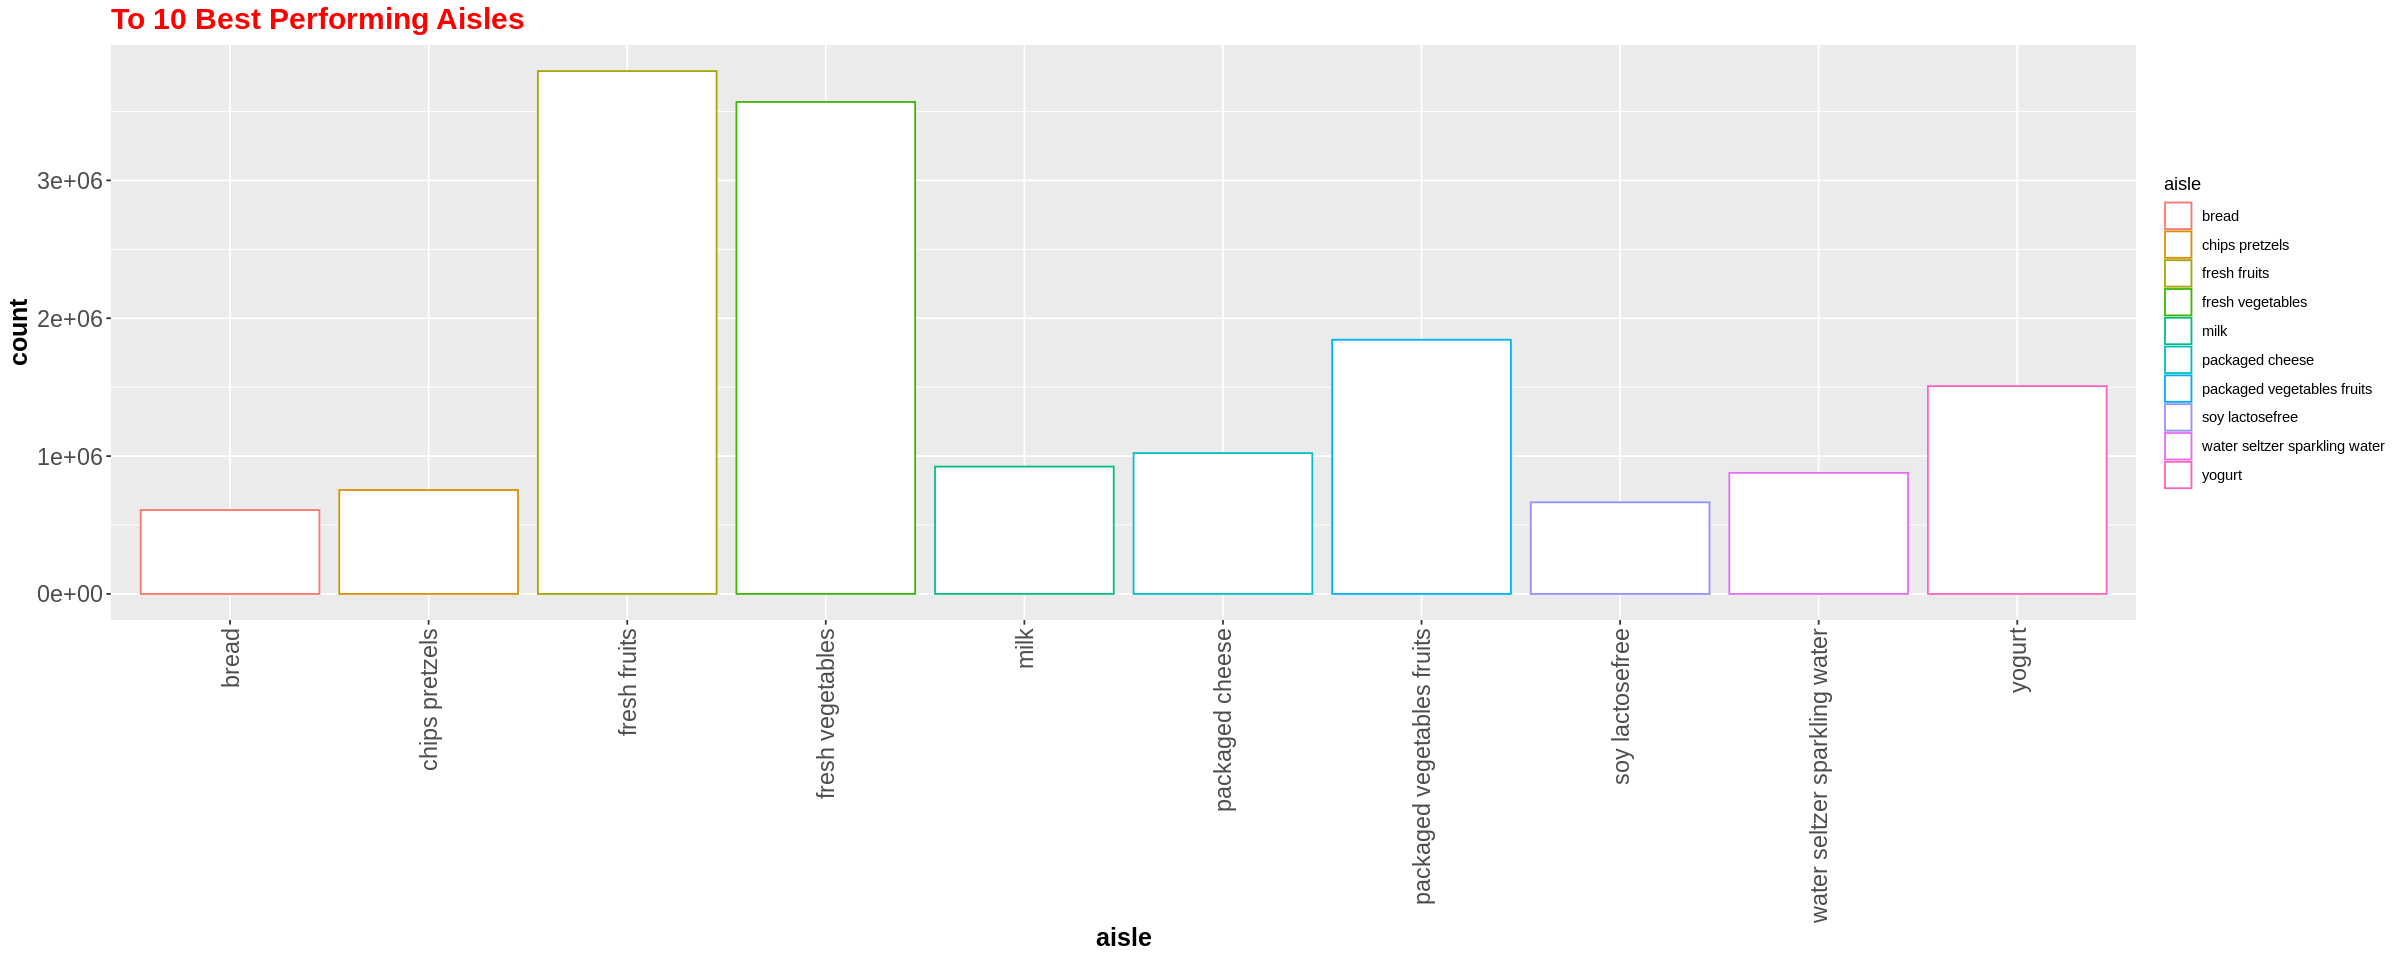

In [47]:
ggplot(ten_aisle) + geom_col(aes(x = aisle, y = count, color = aisle), fill = 'white') +  
scale_x_discrete(guide = guide_axis(angle = 90)) + ggtitle('To 10 Best Performing Aisles') +
theme(plot.title = element_text(color="red", size=18, face="bold"),
axis.title.x = element_text(size=15, face="bold"),
axis.title.y = element_text(size=15, face="bold"),
axis.text.x = element_text(size=14),
axis.text.y = element_text(size=14))   # edit labels & ticks

Fresh fruits and fresh Vegetables aisles have the highest sales. Apparently people are eating healthy :)...

## 3.3 Top 10 best performing departments
Joining the prods_id_ord table with dept_prods dataset will provide more details about ordered products and their respective departments.

In [48]:
dept_prod_name <- left_join(prods_id_ord, dept_prods, by = 'product_id')   # join with dept_prods
sum(is.na(dept_prod_name)) 

[1] 0

In [49]:
(ten_depts <- dept_prod_name %>% group_by(department) %>% summarise(count = n()) %>% arrange(desc(count)) %>% top_n(10))

Selecting by count



department,count
<fct>,<int>
produce,9888378
dairy eggs,5631067
snacks,3006412
beverages,2804175
frozen,2336858
pantry,1956819
bakery,1225181
canned goods,1114857
deli,1095540


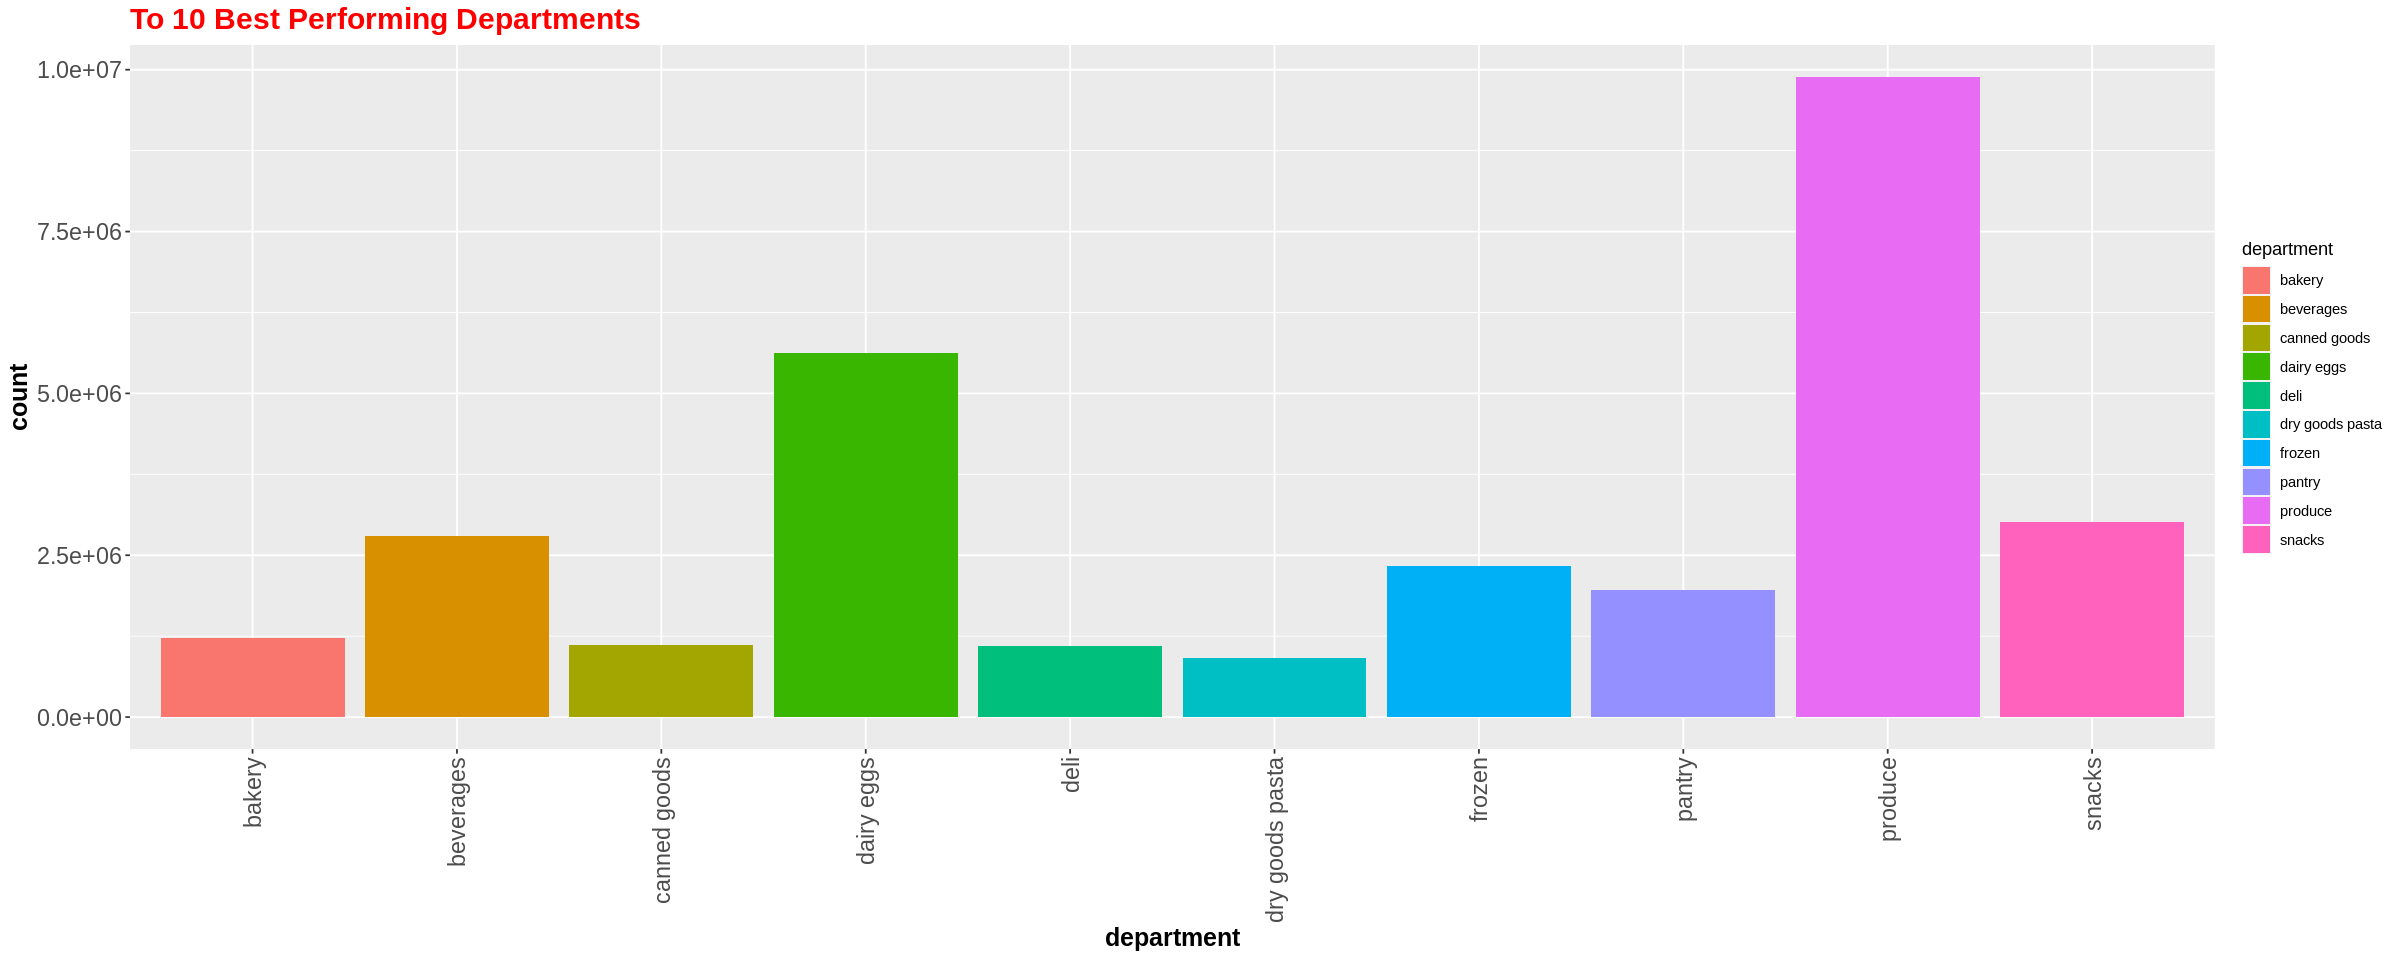

In [50]:
ggplot(ten_depts) + geom_col(aes(x = department, y = count, fill = department)) +  
scale_x_discrete(guide = guide_axis(angle = 90)) + ggtitle('To 10 Best Performing Departments') +
theme(plot.title = element_text(color="red", size=18, face="bold"),
axis.title.x = element_text(size=15, face="bold"),
axis.title.y = element_text(size=15, face="bold"),
axis.text.x = element_text(size=14),
axis.text.y = element_text(size=14))   # edit labels & ticks

## 3.4 Top 15 best performing products
To achieve this, group_by, count and arrange the product_name column of either the dept_prod_name or aisle_prod_name dataset.

In [51]:
(fif_prods <- dept_prod_name %>% group_by(product_name) %>% summarise(count = n()) %>% arrange(desc(count)) %>% top_n(15))

Selecting by count



product_name,count
<fct>,<int>
Banana,491291
Bag of Organic Bananas,394930
Organic Strawberries,275577
Organic Baby Spinach,251705
Organic Hass Avocado,220877
Organic Avocado,184224
Large Lemon,160792
Strawberries,149445
Limes,146660


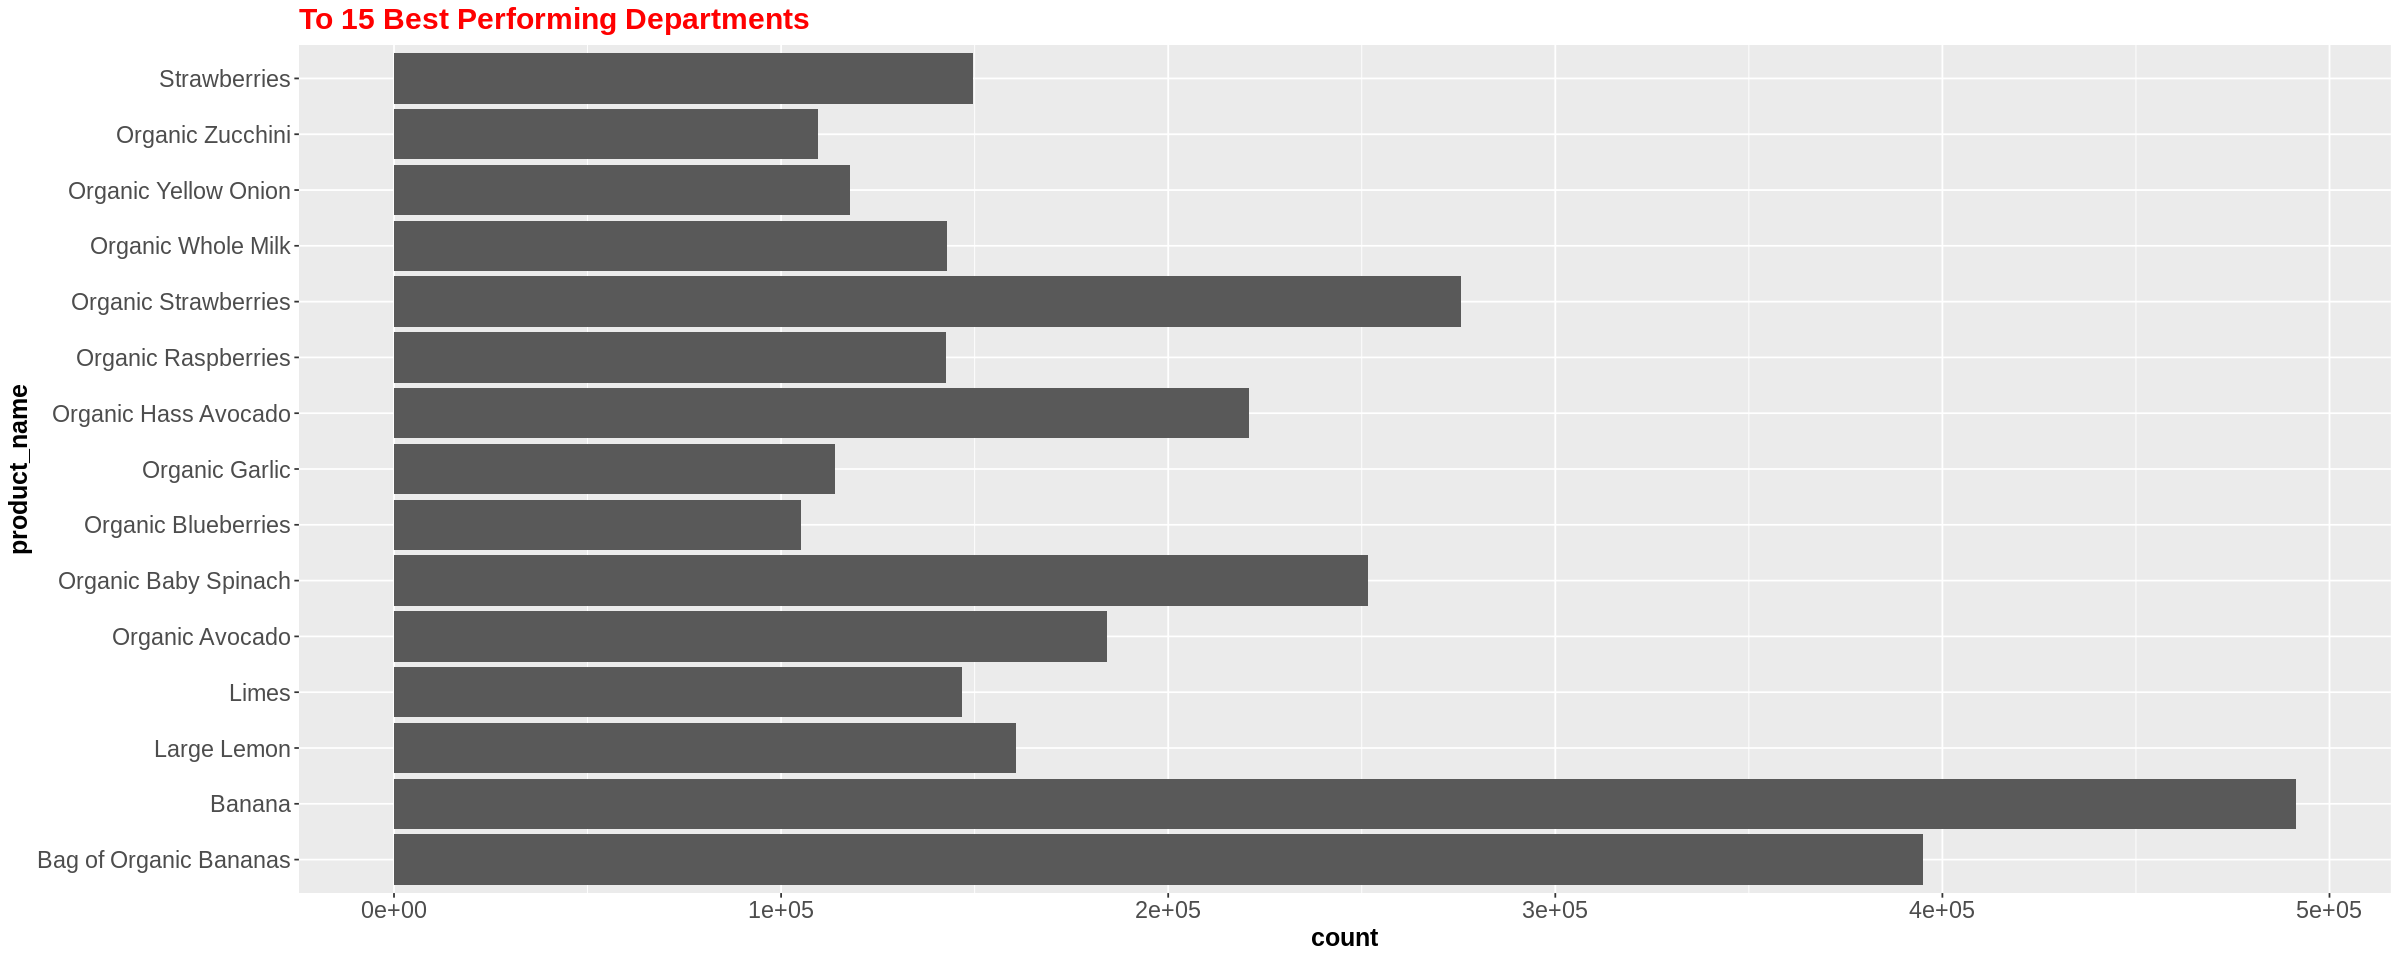

In [52]:
#options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(fif_prods) + geom_col(aes(x = product_name, y = count)) + ggtitle('To 15 Best Performing Departments') +
theme(plot.title = element_text(color="red", size=18, face="bold"),
axis.title.x = element_text(size=15, face="bold"),
axis.title.y = element_text(size=15, face="bold"),
axis.text.x = element_text(size=14),
axis.text.y = element_text(size=14)) +
coord_flip()  # edit labels & ticks

Top 15 performing products are all organic. 

##3.5 Which customers have bought the highest number of products?

In [53]:
dept_prod_name %>% group_by(user_id) %>% summarise(count = n()) %>% arrange(desc(count)) %>% top_n(10)

Selecting by count



user_id,count
<int>,<int>
201268,3725
129928,3689
164055,3089
176478,2952
186704,2936
137629,2931
182401,2929
33731,2912
108187,2760


These users deserve awards.They are the top 10 customers that have bought the most products. Unfortunately the dataset provided has been anonymized, hence no further details about the users. 

## 3.6 What days do people shop the most?

In [54]:
(shop_days <-orders_df %>% group_by(order_dow) %>% summarise(count = n()))

,order_dow,count
,<int>,<int>
1,0,585237
2,1,576377
3,2,458074
4,3,428087
5,4,417171
6,5,443388
7,6,437749


In [55]:
# convert numbers in order_dow to days of the week
shop_days$order_dow[shop_days$order_dow == 0] <- 'Sunday'
shop_days$order_dow[shop_days$order_dow == 1] <- 'Monday'
shop_days$order_dow[shop_days$order_dow == 2] <- 'Tuesday'
shop_days$order_dow[shop_days$order_dow == 3] <- 'Wednessday'
shop_days$order_dow[shop_days$order_dow == 4] <- 'Thursday'
shop_days$order_dow[shop_days$order_dow == 5] <- 'Friday'
shop_days$order_dow[shop_days$order_dow == 6] <- 'Saturday'

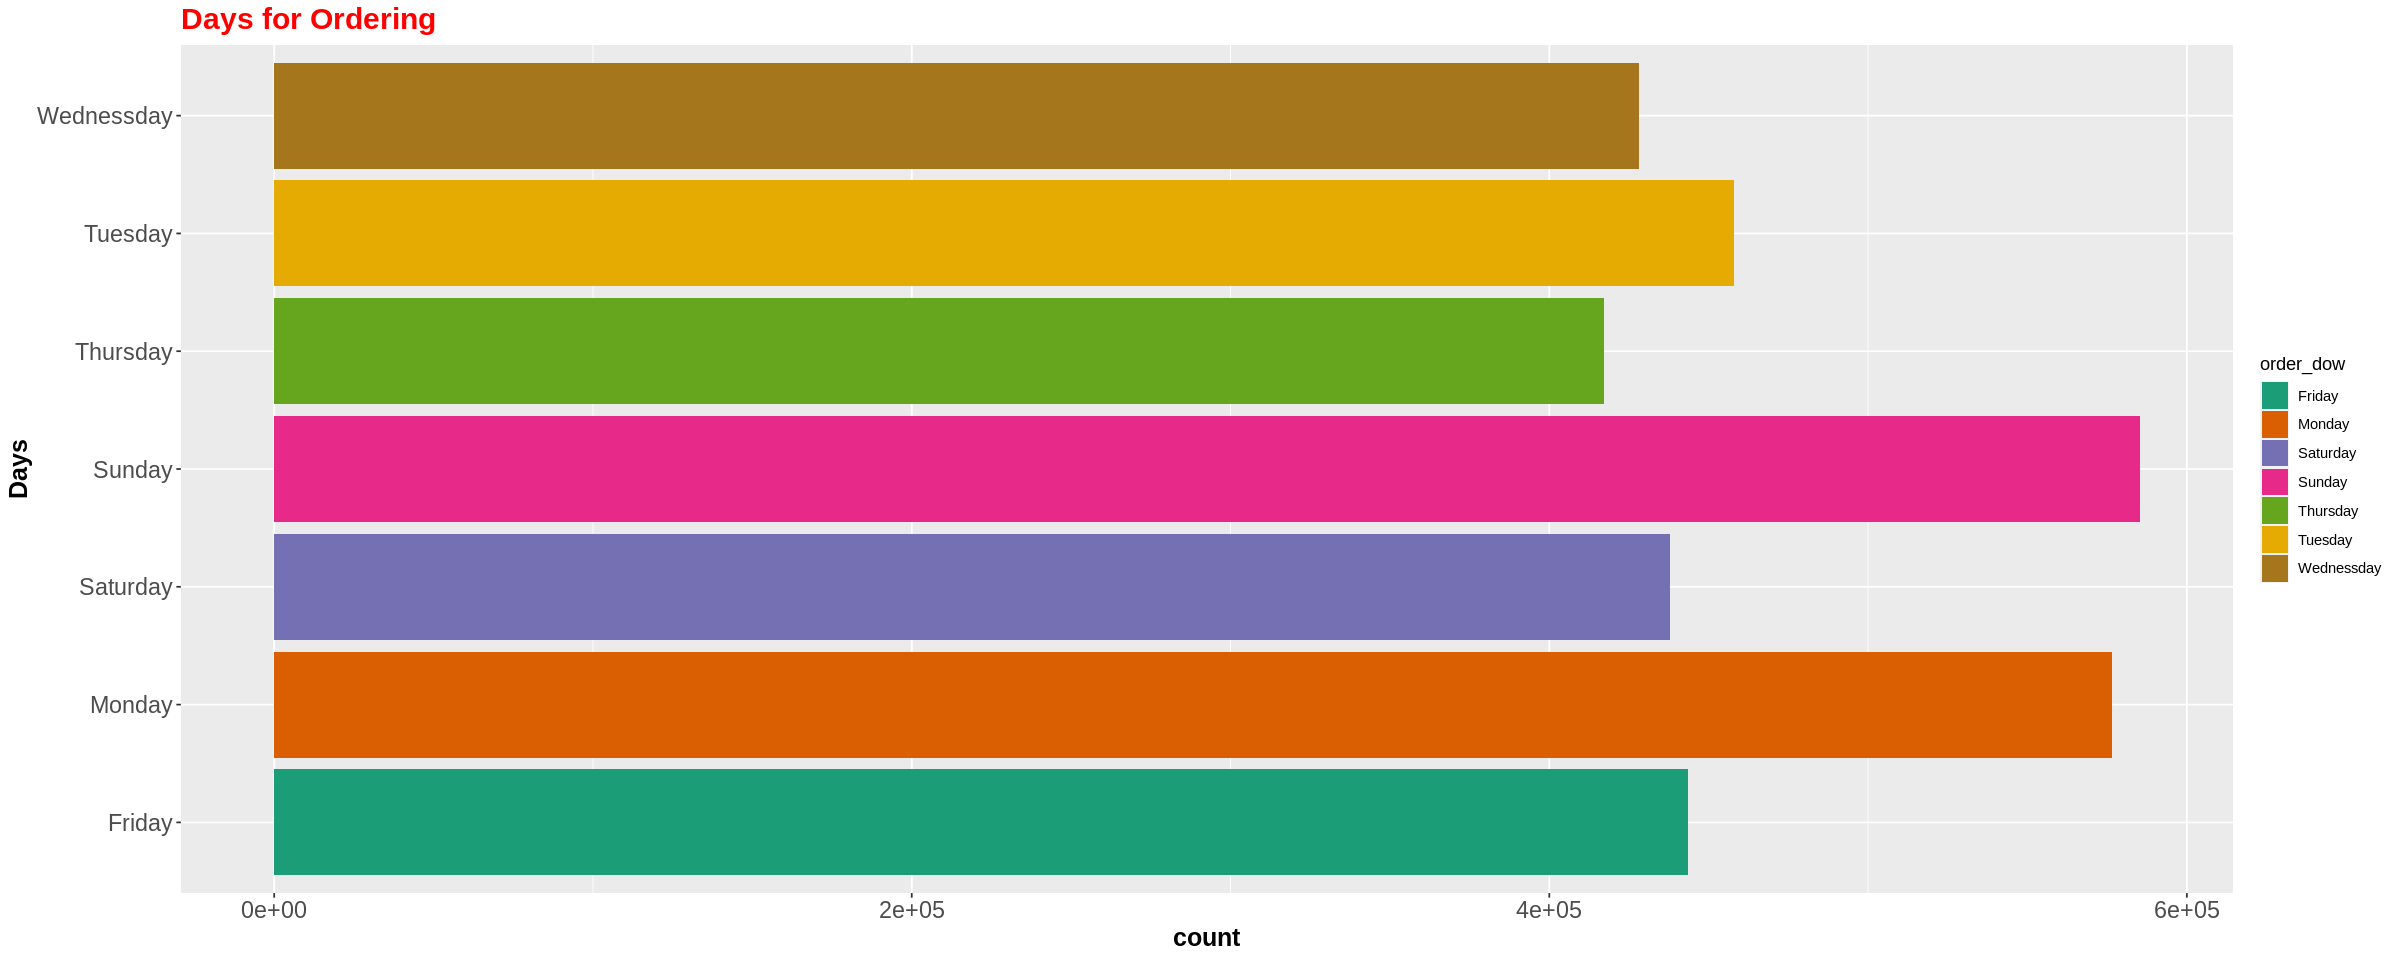

In [56]:
#options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(shop_days) + geom_col(aes(x = order_dow, y = count, fill = order_dow)) + ggtitle('Days for Ordering') + xlab('Days') + 
theme(plot.title = element_text(color="red", size=18, face="bold"),
axis.title.x = element_text(size=15, face="bold"),
axis.title.y = element_text(size=15, face="bold"),
axis.text.x = element_text(size=14),
axis.text.y = element_text(size=14)) +
coord_flip() + scale_fill_brewer(palette = "Dark2")# edit labels & ticks

## 3.7 What hours do people shop the most?

In [57]:
(shop_hours<-orders_df %>% group_by(order_hour_of_day) %>% summarise(count = n())%>% arrange(desc(count)))

order_hour_of_day,count
<int>,<int>
10,282470
11,278616
15,277207
14,276659
13,271885
12,266828
16,266444
9,252529
17,223433


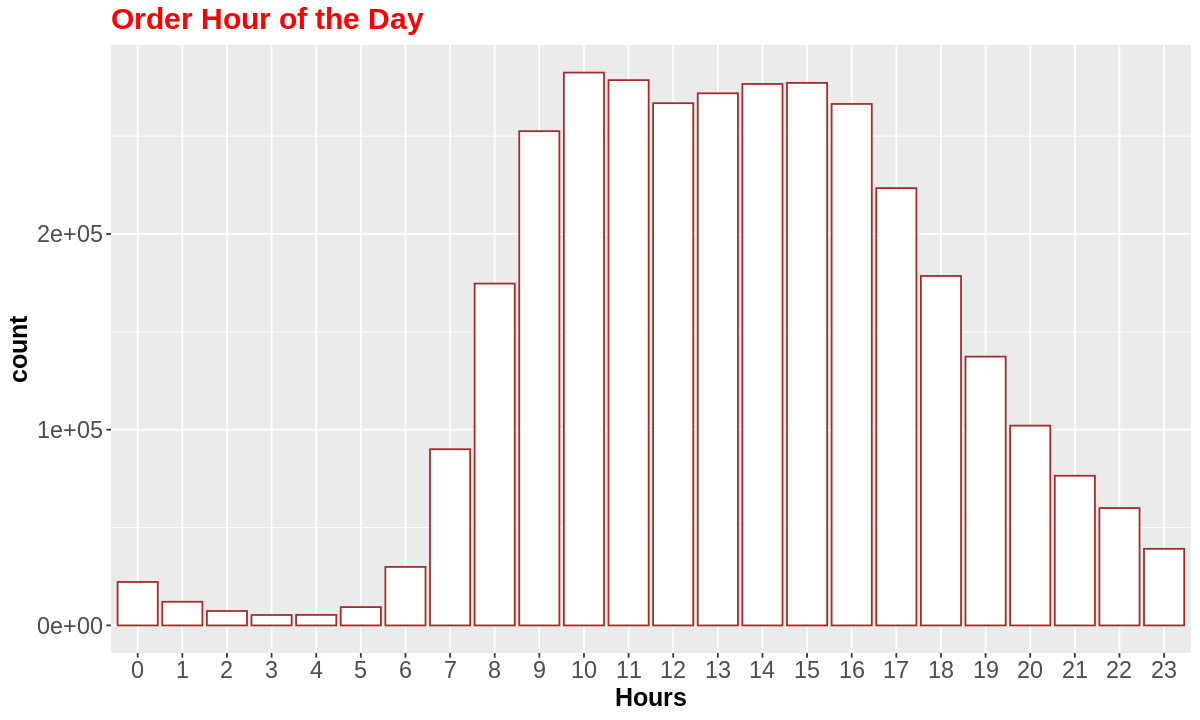

In [58]:
options(repr.plot.width = 10, repr.plot.height = 6)
ggplot(shop_hours) + geom_col(aes(x = factor(order_hour_of_day) , y = count), fill = 'white', color = 'brown') + ggtitle('Order Hour of the Day') + xlab('Hours') + 
theme(plot.title = element_text(color="red", size=18, face="bold"),
axis.title.x = element_text(size=15, face="bold"),
axis.title.y = element_text(size=15, face="bold"),
axis.text.x = element_text(size=14),
axis.text.y = element_text(size=14)) # edit labels & ticks

In [59]:
round((shop_hours %>% filter(order_hour_of_day %in% c(10, 11, 15, 14, 13, 12, 16)) %>% summarise(sum(count)))/sum(shop_hours$count)*100)

sum(count)
<dbl>
57


About 57% of all orders occur between 9am and 4pm.

## 3.8 What products are people buying in the peak hours.
Focusing on the peak hours mentioned above, this analysis will give us insight into the top 10 purchased products. To achieve this, the hours between 10am and 4pm will be filtered from the dept_prod_name dataset, followed by grouping, counting and arranging by product_name. 

In [60]:
# Using the dept_prod_name filter out hours 10am to 4pm
dept_prod_name %>%filter(order_hour_of_day %in% c(10, 11, 15, 14, 13, 12, 16)) %>% 
  group_by(product_name) %>% 
    summarise(count = n()) %>% 
      arrange(desc(count)) %>%
        top_n(10)

Selecting by count



product_name,count
<fct>,<int>
Banana,276105
Bag of Organic Bananas,222173
Organic Strawberries,153526
Organic Baby Spinach,143840
Organic Hass Avocado,126310
Organic Avocado,106897
Large Lemon,95342
Limes,87785
Strawberries,84286


Very similar to overall top most purchased products except for limes and strawberries that switched position. Similarly, organic Raspberries took the position of Organic Whole Milk.

## 3.9 Basket size Analysis
This analysis seeks to understand the most frequent number of items per order.

In [61]:
bask_size <- dept_prod_name %>% group_by(order_id) %>% summarise (product_number = n()) %>% arrange(desc(product_number))
head(bask_size)

order_id,product_number
<int>,<int>
1564244,145
790903,137
61355,127
2970392,121
2069920,116
3308010,115


These are the order Ids with the most products.

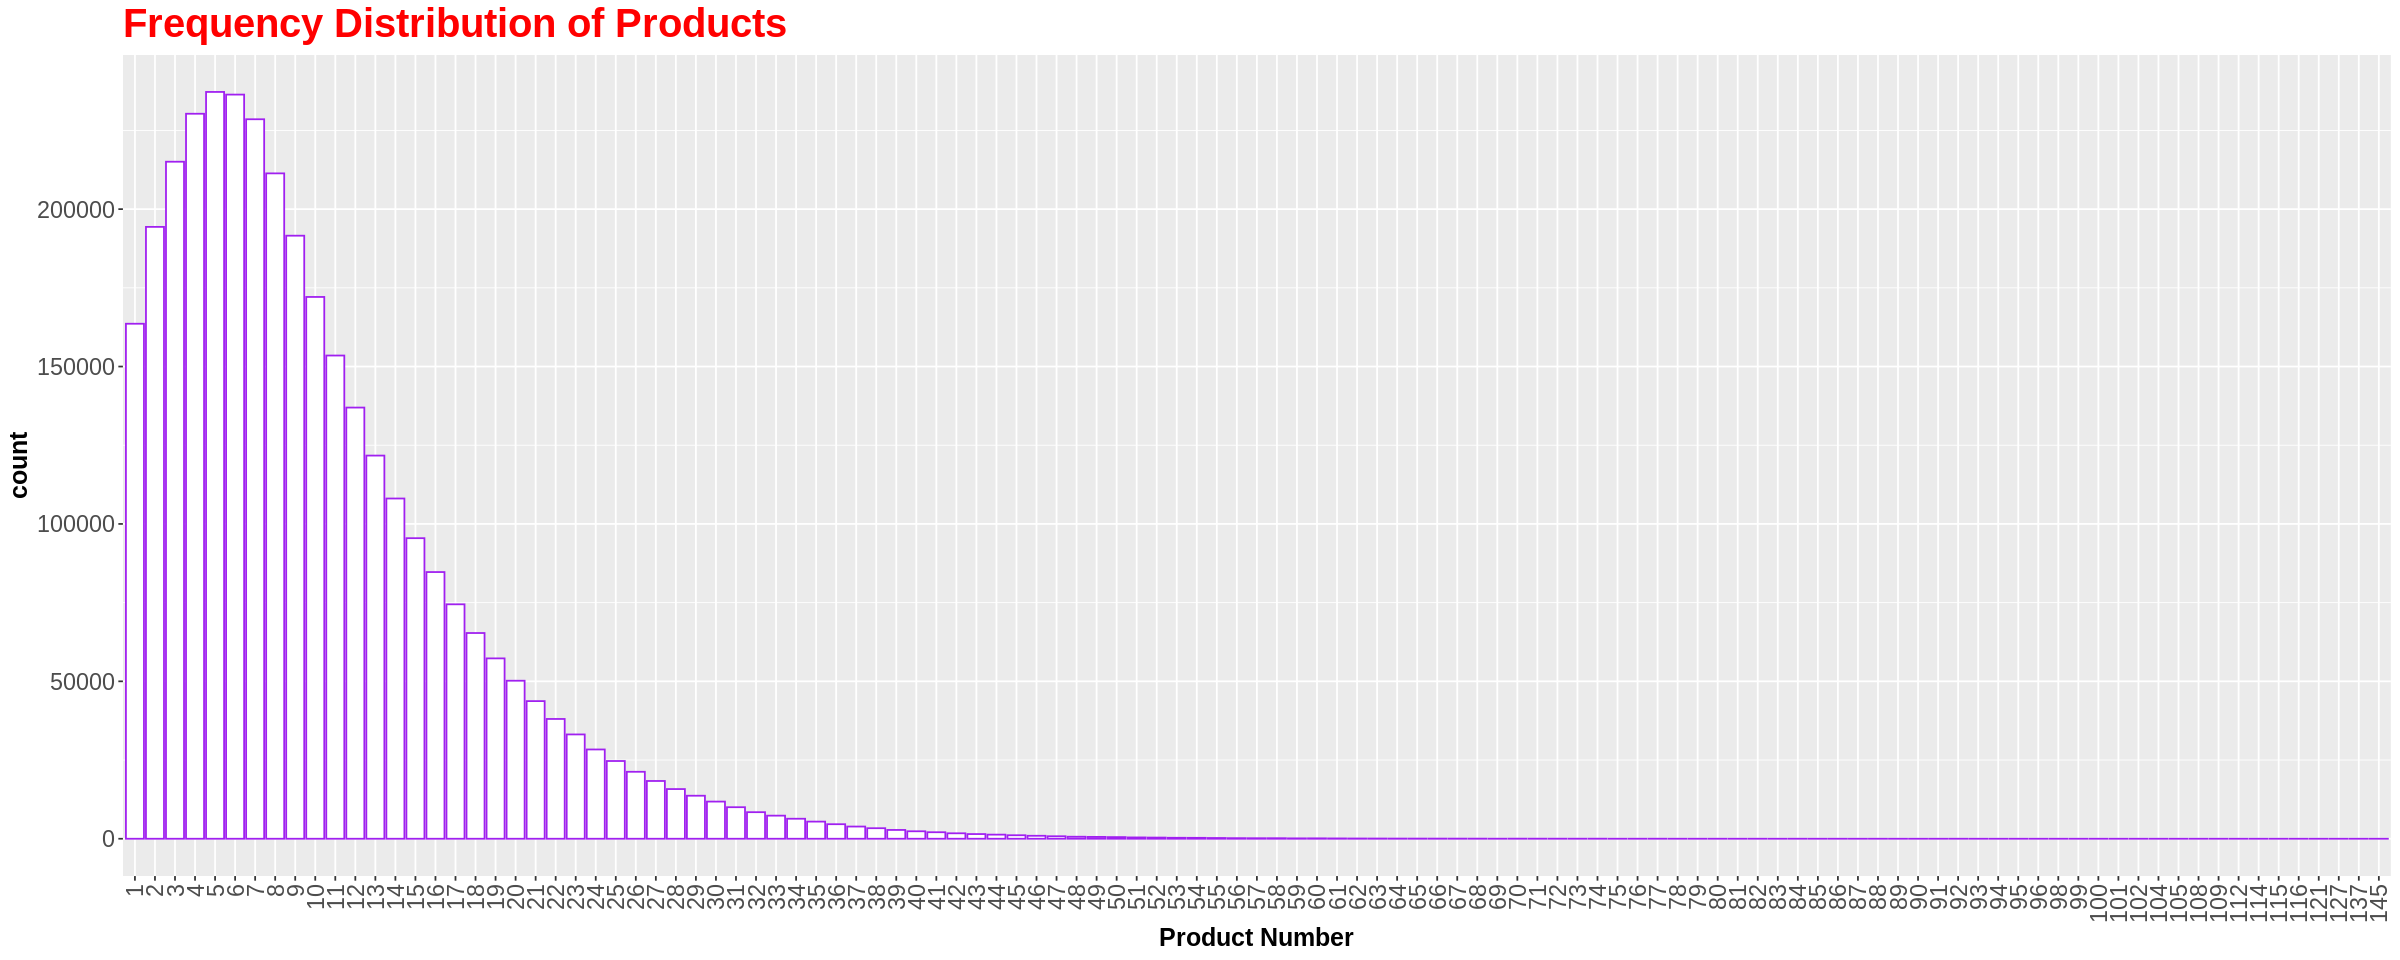

In [62]:
options(repr.plot.width = 20, repr.plot.height = 8)
ggplot(bask_size) + geom_bar(aes(x = factor(product_number)), fill = 'white', color = 'purple') + ggtitle('Frequency Distribution of Products') +
xlab('Product Number')+  scale_x_discrete(guide = guide_axis(angle = 90)) +
theme(plot.title = element_text(color="red", size=24, face="bold"),
axis.title.x = element_text(size=15, face="bold"),
axis.title.y = element_text(size=15, face="bold"),
axis.text.x = element_text(size=14),
axis.text.y = element_text(size=14))   # edit labels

Most orders (more than 25,000 orders) contain either 5 or 6 products, and there is an order that contained upto 145 products.

## 3.10 Analysing reordered products

In [63]:
round(prop.table(table(dept_prod_name$reordered))*100)


 0  1 
41 59 

In [64]:
reord <- dept_prod_name %>% group_by(reordered) %>% summarise(count = n()) 

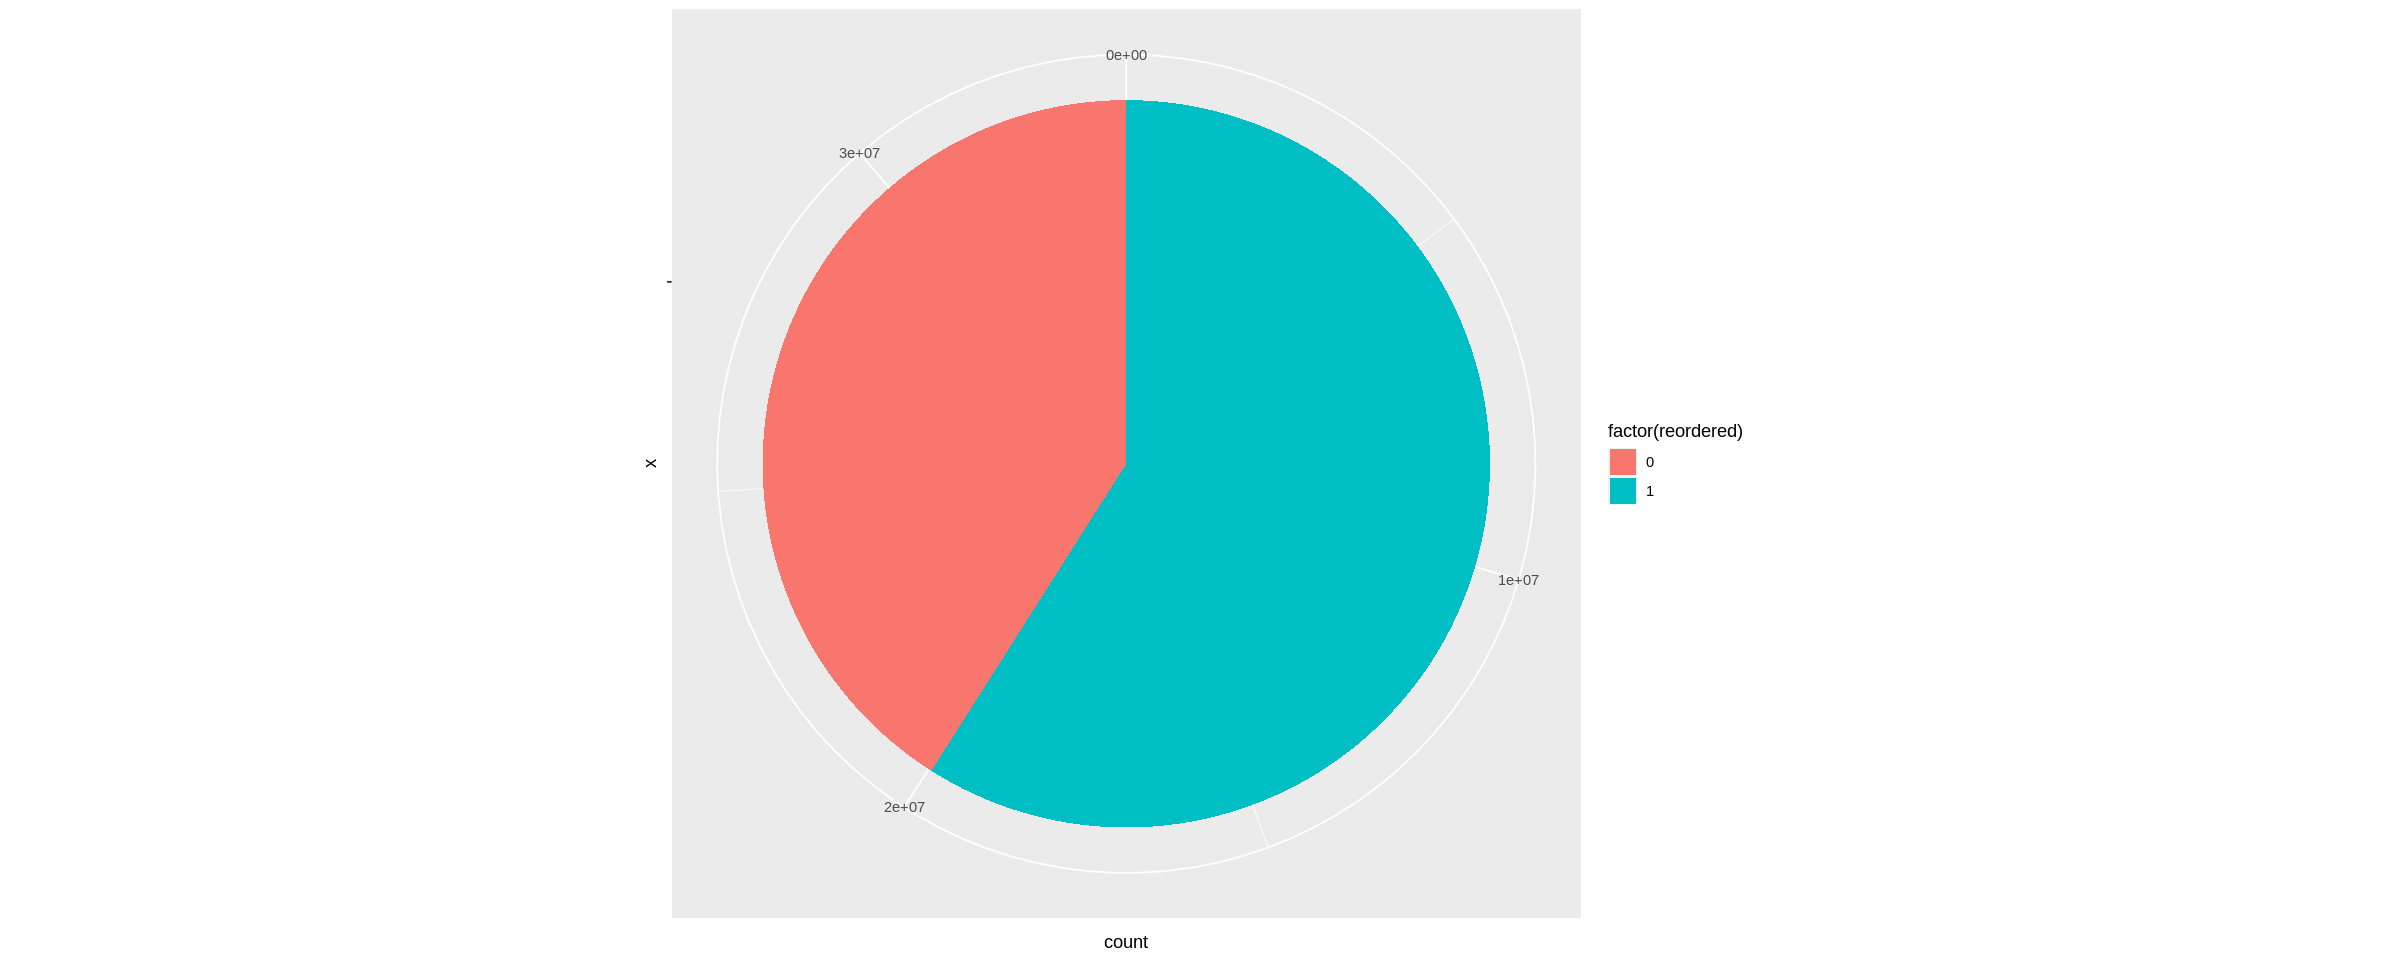

In [65]:
 ggplot(reord, aes(x = "", y = count, fill= factor(reordered)))+ geom_bar(width = 1, stat = "identity") + coord_polar("y", start=0) 

59% of all products bought were re-ordered.

## 3.11 What days do new users make orders?
To achieve this, I will focus on orders whose order_number is 1. Order number of 1 indicates that it is the user's first time of making an order.

In [66]:
orders_df %>% filter(order_number == 1) %>% group_by(order_dow) %>% summarise(count = n()) %>% arrange(desc(count))

order_dow,count
<int>,<int>
0,38517
1,34973
6,28691
2,27861
5,26073
3,25658
4,24436


Top 3 days are Sunday, Monday and Saturday.

# 4. Market Basket Analysis
Often used in the retail industry to help retailers undertand the purchase behaviour of their customers. Market Basket Analysis uses association rule mining to find associations between items that customers place. it is used in features such as the frequently bought together section found in on ecommerce sites. For example if a customer buys a phone, there is high possibility that he or she would buy a phone case. This technique helps retailers to develop marketing strategies to cross sell products and increase revenue.

## 4.1 Convert Dataframe to transactional class
The first step is to select only relevant columns. Due to computing resources. I will be focusing on a subset of the entire dataset (150,000 records).

In [79]:
trans_df <- dept_prod_name %>% filter(eval_set == 'train') %>% select(order_id, product_name) %>% top_n(150000) #select only required columns

Selecting by product_name



In [81]:
dim(trans_df) # number of records

[1] 150018      2

In [83]:
head(trans_df) # first 6 records

,order_id,product_name
,<int>,<fct>
1,1187899,XL Pick-A-Size Paper Towel Rolls
2,1187899,Zero Calorie Cola
3,1492625,Unsweetened Almondmilk
4,1492625,Uncured Slow Cooked Ham
5,1492625,Vegetable Lasagna
6,2196797,Tamari Gluten Free Soy Sauce


In [84]:
trans_df$order_id = factor(trans_df$order_id)    # transform order_id into factor

In [85]:
write.csv(trans_df,"transact150k.csv", row.names = FALSE) # Export to CSV to be used in part 2

Check MBAnalysis_Part_2.ipynb for the continuation